In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize

import csv
import pandas as pd

import glob #for
#using wildcard searches to locate files
from scipy.signal import find_peaks

#create three lists to store data
decay_times = []
muon_pulse_heights = []
decay_pulse_heights = []

#file paths (relative)
# path = '.'
all_files = glob.glob("*.csv")

#loop through each file and do the analysis on each run, append results to lists.
for filename in all_files:
    if '_traces' in filename:
        
        try:
            f = open(filename, newline='')
        except:
            print(f'Could not open {filename}.')
            continue
        
        #print(f'Processing {filename}.')
        reader = csv.reader(f, quoting = csv.QUOTE_NONE)

        while True:
            try:
                ch, evt = next(reader)
            except:
                break
        
            #create array for times and voltages 
            times = np.array(next(reader))
            times = times.astype(float)
            
            voltages = np.array(next(reader))
            voltages = voltages.astype(float)

            x = np.gradient(voltages)   ##gradient
            #peaks, _ = find_peaks(x, distance=1000)
            #peaks, _ = find_peaks(x, prominence=65) # BEST!
            peaks, _ = find_peaks(x, width=12)
            width = 12
            
            # Use a try block to establish the average baseline voltage for both peaks on a run,
            # Identify the max peak voltages
            # Compute the decay_time by subtracting the time separation of the peaks
            try:
                baseline = voltages[peaks[0]-width-10:peaks[0]-width] #10ish point sample of baseline
                avg = np.average(baseline)
                baselineTwo = voltages[peaks[1]-width-10:peaks[1]-width]
                avgTwo = np.average(baselineTwo)
                
                maxVone = np.max(voltages[peaks[0]:peaks[1]])
                maxVtwo = np.max(voltages[peaks[1]:])
                
                decay_times.append(times[peaks[1]]-times[peaks[0]])
                
                pulseHeightone = maxVone - avg
                pulseHeightTwo = maxVtwo - avgTwo
                muon_pulse_heights.append(pulseHeightone)
                decay_pulse_heights.append(pulseHeightTwo)
            except:
                continue
                
print("P_H_1", pulseHeightone)
print("P_H_2", pulseHeightTwo)

/var/folders/tx/tv7gd2xd0554_xx6qzsnl36m0000gn/T/ipykernel_66612/4188288969.py:50: PeakPropertyWarning: some peaks have a width of 0
  peaks, _ = find_peaks(x, width=12)
/Users/perfecto/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/perfecto/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


P_H_1 6293.436227
P_H_2 2701.4100000000017


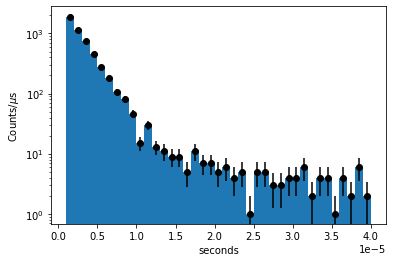

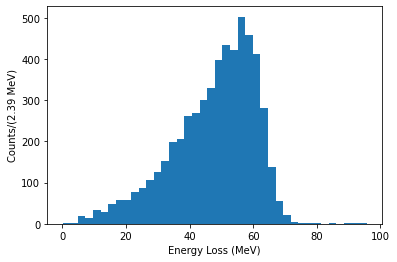

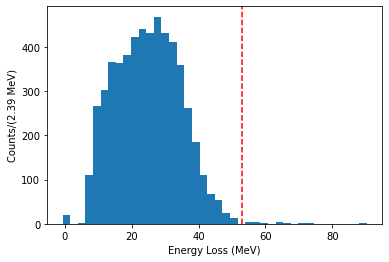

Found 5522 potential decay events.


In [2]:
#make 3 histograms, one for decay times, one for pulse heights, and one for decay_pulse heights
# 1ms per bin

counts, time, _ = plt.hist(decay_times, 39, range=(1e-6, 40e-6)) #need error bars
plt.errorbar(time[:-1] + 0.5e-6, counts, yerr=np.sqrt(counts), fmt='ko')
plt.yscale('log')
plt.ylabel(r'Counts/$\mu$s')
plt.xlabel('seconds')
plt.show()




# 47.33 is the mean energy loss / 4950milivolts , 40 bins
plt.hist(np.array(muon_pulse_heights) * 47.33/4950, 40) #using calibrated expected energies.
# plt.yscale('log')
plt.ylabel('Counts/(2.39 MeV)')
plt.xlabel('Energy Loss (MeV)')
plt.savefig("MuonCapture.png")
plt.show()

plt.hist(np.array(decay_pulse_heights) * 47.33/4950, 40)
plt.gca().axvline(53, color='r', ls='--')
# plt.yscale('log')
plt.ylabel('Counts/(2.39 MeV)')
plt.xlabel('Energy Loss (MeV)')
plt.savefig("Decaycapture.png")
plt.show()

#2.2E-6  #mean lifetime muon
# print(decay_times)   
# print(muon_pulse_heights)
# print(decay_pulse_heights)
# print(decay_times)
print(f'Found {len(decay_pulse_heights)} potential decay events.')

#counts, bins = np.histogram(x)
# plt.stairs(bins, counts)



<!--  look at singles for calibration
single sin run#.csv
time and pulse hiehgt for each live channel
error bar on life time
energy loss table
produce single muon pulse height histogram spectrum -->

In [3]:
#file paths (relative)
#path = '.'

#This code block is indentical to the first except used to analysis a single run.

single_decay_times = []
single_muon_pulse_heights = []
single_decay_pulse_heights = []

# need to find a way to read all the single files at once now. 

single_files = glob.glob("Run0000.csv")  ##can use pandas data frame
print(single_files)

for filename in all_files:
    if '_traces' in filename:
        
        try:
            f = open(filename, newline='')
        except:
            print(f'Could not open {filename}.')
            continue
        
        #print(f'Processing {filename}.')
        reader = csv.reader(f, quoting = csv.QUOTE_NONE)

        while True:
            try:
                ch, evt = next(reader)
            except:
                break
        
            times = np.array(next(reader))
            times = times.astype(float)

            voltages = np.array(next(reader))
            voltages = voltages.astype(float)

            x = np.gradient(voltages)   ##gradient
            #peaks, _ = find_peaks(x, distance=1000)
            #peaks, _ = find_peaks(x, prominence=65) # BEST!
            peaks, _ = find_peaks(x, width=12)

            width = 12
            try:
                baseline = voltages[peaks[0]-width-10:peaks[0]-width] #10ish point sample of baseline
                avg = np.average(baseline)
                baselineTwo = voltages[peaks[1]-width-10:peaks[1]-width]
                avgTwo = np.average(baselineTwo)
                maxVone = np.max(voltages[peaks[0]:peaks[1]])
                # print(maxVone)
                # print(maxVtwo)
                maxVtwo = np.max(voltages[peaks[1]:])
                # timePulseOne = times[peaks[1]] - times[peaks[0]]
                single_decay_times.append(times[peaks[1]]-times[peaks[0]])
                # print(timePulseOne)

                pulseHeightone = maxVone - avg
                pulseHeightTwo = maxVtwo - avgTwo
                single_muon_pulse_heights.append(pulseHeightone)
                single_decay_pulse_heights.append(pulseHeightTwo)
            except:
                continue

['Run0000.csv']


/var/folders/tx/tv7gd2xd0554_xx6qzsnl36m0000gn/T/ipykernel_66612/2877855886.py:42: PeakPropertyWarning: some peaks have a width of 0
  peaks, _ = find_peaks(x, width=12)
/Users/perfecto/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/perfecto/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


average energy loss MeV/cm 47.33466276


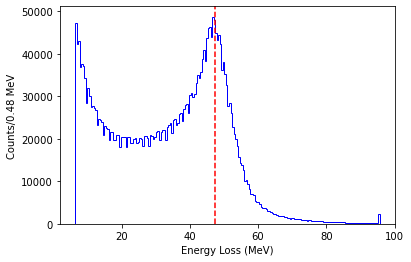

In [4]:
import pandas as pd
from pathlib import Path
import configparser
                                                                    

path = '.'
config = configparser.ConfigParser()
runTime = 0
nRuns   = 0


rangeFiles = range(0, 670) # this works for looping all runs
runNumbers = list(rangeFiles) 



for runNumber in runNumbers:



    baseName = f'Run{runNumber:04d}'
    #print(baseName)
    config.read(baseName+'.info')



    runTime += config.getfloat('Run', 'Run Time (s)')
    
    # Read the raw data from the current run into a dataframe
    datapath = path+'/'+baseName+'.csv'
    df_thisrun = pd.read_csv(datapath)
    
    if nRuns == 0:
        df = df_thisrun
    else:
        df = pd.concat([df, df_thisrun])
    
    # Free up memory (for Python, not the OS)
    del df_thisrun
    
    nRuns += 1

# average energyloss of sea lvl muons (electrons knocking into electrons) (stopping power)    
print("average energy loss MeV/cm", 3.667 * 1.694 * 2.54 * 3)

#print("runs", nRuns)
#print("df", df)


plt.hist(df['pulse_height_A']*47.33/4950, bins=200, histtype='step', color='blue') #4950 milivolts
#plt.hist(df['pulse_height_A'], bins=200, histtype='step', color='blue') #4950 milivolts
plt.gca().axvline(47.33, color='r', ls='--')
plt.ylabel('Counts/0.48 MeV') 
plt.savefig("SingleMuons.png")
plt.xlabel('Energy Loss (MeV)')
plt.show()

In [5]:
#print(40e-6 * 1.306)
print(len(df['pulse_height_A']))
plt.savefig('pulse_heightA.png', bbox_inches='tight')
#print(len(df['pulse_height_A'])/runTime)

3152474


<Figure size 432x288 with 0 Axes>

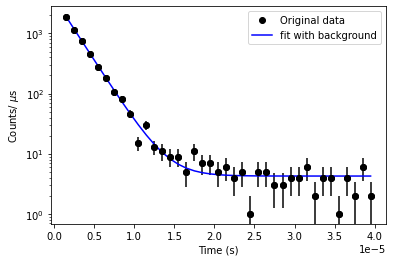

2.102969830245033e-06 +/- 1.3152415842211135e-08
4.260743508812332 +/- 1.226725000012839
5522


In [6]:
## NOTES FOR UNDERSTANDING CURVE_FIT

# Users should ensure that inputs xdata, ydata, and the output of f are float64,
# or else the optimization may return incorrect results.

# Returns
# popt-array
# Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.

# pcov-2-D array
# The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. 
# To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).

# In the function, we should use an asterisk ( * ) before the parameter name to pass a variable number of arguments

# Covariance measures the direction of the relationship between two variables. 
# A positive covariance means that both variables tend to be high or low at the same time.
# A negative covariance means that when one variable is high, the other tends to be low.

## Our possible fit functions 

def exp_func(x, a, b, c):
    return a * np.exp(-x/b) + c  #b is the time constant mean life time ≈ 2.2E-6

# def exp_squared_func(x, a, b, c):
#     return a * np.exp(-b * x*x*x) + c

# def linear_func(x, a, b):
#     return a*x + b

    # example arrays
    # x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], np.float)
    # y = np.array([1, 1, 1, 1, 0.805621, 0.798992, 0.84231, 0.728796, 0.819471, 0.570414, 0.355124, 0.276447, 0.159058, 0.0762189, 0.0167807, 0.0118647, 0.000319948, 0.00118267, 0, 0, 0], np.float)

x = time[:-1] + 0.5e-6
y = counts

p0 = [2000, 2e-6, 5];
# popt_lin, pcov_lin      = scipy.optimize.curve_fit(linear_func, x, y)
popt_exp, pcov_exp      = scipy.optimize.curve_fit(exp_func, x, y, p0=p0)
# popt_exp_2, pcov_exp_2  = scipy.optimize.curve_fit(exp_squared_func, x, y)

plt.figure()
plt.plot(x, y, 'ko', label="Original data")
plt.errorbar(time[:-1] + 0.5e-6, counts, yerr=np.sqrt(counts), fmt='ko')
plt.plot(x, exp_func(x, *popt_exp), 'b-', label='fit with background')
#plt.plot(x, exp_func(x, *p0), 'b-', label='exponential')
plt.yscale('log')
plt.ylabel(r'Counts/ $\mu$s')
plt.xlabel('Time (s)')
plt.legend()
plt.savefig("test.png")
plt.show()
    
print(popt_exp[1], '+/-', np.sqrt(pcov_exp[1][1]))
print(popt_exp[2], '+/-', np.sqrt(pcov_exp[2][2]))
    
# Want model that has the lowest residual
# numpy.linalg.norm(y-func(x, *popt))


# xdata = np.linspace(0, 4, 50)
# y = func(xdata, 2.5, 1.3, 0.5)
# rng = np.random.default_rng()
# y_noise = 0.2 * rng.normal(size=xdata.size)
# ydata = y + y_noise
# plt.plot(xdata, ydata, 'b-', label='data')

# popt, pcov = curve_fit(func, xdata, ydata)

# plt.plot(xdata, func(xdata, *popt), 'r-',
#          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))

# plt.plot(xdata, func(xdata, *popt), 'g--',
#          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()


#print(len(decay_times))

In [7]:
#2.102969830245033e-06 mean lifetime

# double rate for accidental coincidences past 20 microseconds. Due to random probabilities.
# coincidence window t = 40 ms
# total cand decay events 5522



#we want nnumber of triggers
#NdP(double) = 0.288
#print(5522*40*10e-6)

#background counts under spectrum
#print(3152474 * 5.224e-5)
#165  4counts/bin